In [28]:
import matplotlib.pyplot as plt # Import library for visualization
import numpy as np # Import NumPy for numerical operations

In [37]:
# Function to print the Sudoku board in a readable format
def print_board(board):
    for row in board:
        print(" ".join(str(num) if num != 0 else '.' for num in row))

In [38]:
# Function to check if placing a number in a cell is valid
def is_valid(board, row, col, num):
    # Check if the number already exists in the same row
    if num in board[row]:
        return False
    # Check if the number already exists in the same column
    if num in [board[i][col] for i in range(9)]:
        return False
    # Determine the top-left coordinates of the 3x3 grid containing the cell
    box_x, box_y = (row // 3) * 3, (col // 3) * 3
    # Check if the number exists in the 3x3 grid
    for i in range(3):
        for j in range(3):
            if board[box_x + i][box_y + j] == num:
                return False
    return True  # Return True if placement is valid


In [39]:
# Function to solve the Sudoku using backtracking
def solve(board):
    for row in range(9):  # Iterate through rows
        for col in range(9):  # Iterate through columns
            if board[row][col] == 0:  # Find an empty cell
                for num in range(1, 10):  # Try numbers 1-9
                    if is_valid(board, row, col, num):  # Check validity
                        board[row][col] = num  # Place number
                        if solve(board):  # Recursively solve next cell
                            return True
                        board[row][col] = 0  # Undo and backtrack if not valid
                return False  # No valid number found, backtrack
    return True  # Return True when all cells are filled

In [40]:
# Function to visualize the Sudoku board using Matplotlib
def plot_board(board):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(10) - 0.5, minor=False)
    ax.set_yticks(np.arange(10) - 0.5, minor=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, which='major', linewidth=2)

    # Fill the board with numbers
    for i in range(9):
        for j in range(9):
            num = board[i][j]
            if num != 0:
                ax.text(j, i, str(num), fontsize=14, ha='center', va='center')

    plt.gca().invert_yaxis()  # Flip the board for correct display
    plt.show()  # Show the plotted board


In [41]:
# Example Sudoku puzzle (0 represents empty cells)
board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

Solved Sudoku:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9


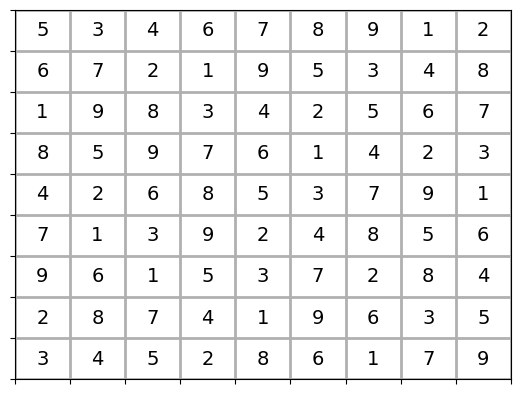

In [42]:
# Solve the Sudoku and display the result
if solve(board):
    print("Solved Sudoku:")
    print_board(board)  # Print the solved board
    plot_board(board)  # Visualize the board using Matplotlib
else:
    print("No solution exists.")  # Display if no solution is found